## K-Means Clustering

**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:

1. Read and understand the data

2. Clean the data

3. Prepare the data for modelling

4. Modelling

5. Final analysis and reco

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
retail_df = pd.read_csv("Online+Retail.csv", sep=",", encoding="ISO-8859-1")
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

### Cleaning the data

In [23]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [24]:
retail_df.isnull().sum()/len(retail_df)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [25]:
retail_df.dropna(inplace=True)

In [26]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [27]:
#Cost Amount: UnitPRice X Quantity
retail_df['amount'] = retail_df['Quantity'] * retail_df['UnitPrice']

### Data Preparation : Identify RFM
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [47]:
#monetary
grouped_df = retail_df.groupby("CustomerID")["amount"].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

CustomerID   amount
0     12346.0     0.00
1     12347.0  4310.00
2     12348.0  1797.24
3     12349.0  1757.55
4     12350.0   334.40

In [33]:
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

CustomerID  frequency
0     12346.0          2
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [48]:
grouped_df = grouped_df.merge(frequency, on='CustomerID', how='inner')
grouped_df.head()

CustomerID   amount  frequency
0     12346.0     0.00          2
1     12347.0  4310.00        182
2     12348.0  1797.24         31
3     12349.0  1757.55         73
4     12350.0   334.40         17

In [39]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 51.0+ MB


In [41]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  amount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34

In [44]:
max_date = max(retail_df['InvoiceDate'])
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  amount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   

               diff  
0 373 days 04:24:00  
1 373 days 04:24:00  
2 373 days 04:24:00  
3 373 days 04:24:00  
4 373 days 04:24:00

In [58]:
recency = retail_df.groupby('CustomerID')['diff'].min()
recency = recency.reset_index()
grouped_df = grouped_df.merge(recency, on='CustomerID', how='inner')
grouped_df['diff'] = grouped_df['diff'].dt.days
grouped_df.head()


CustomerID   amount  frequency  diff
0     12346.0     0.00          2   325
1     12347.0  4310.00        182     1
2     12348.0  1797.24         31    74
3     12349.0  1757.55         73    18
4     12350.0   334.40         17   309

### Data Preparation Steps
1. outlier treatment
2. rescaling

In [101]:
#remove outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)

IQR = Q3 - Q1

grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

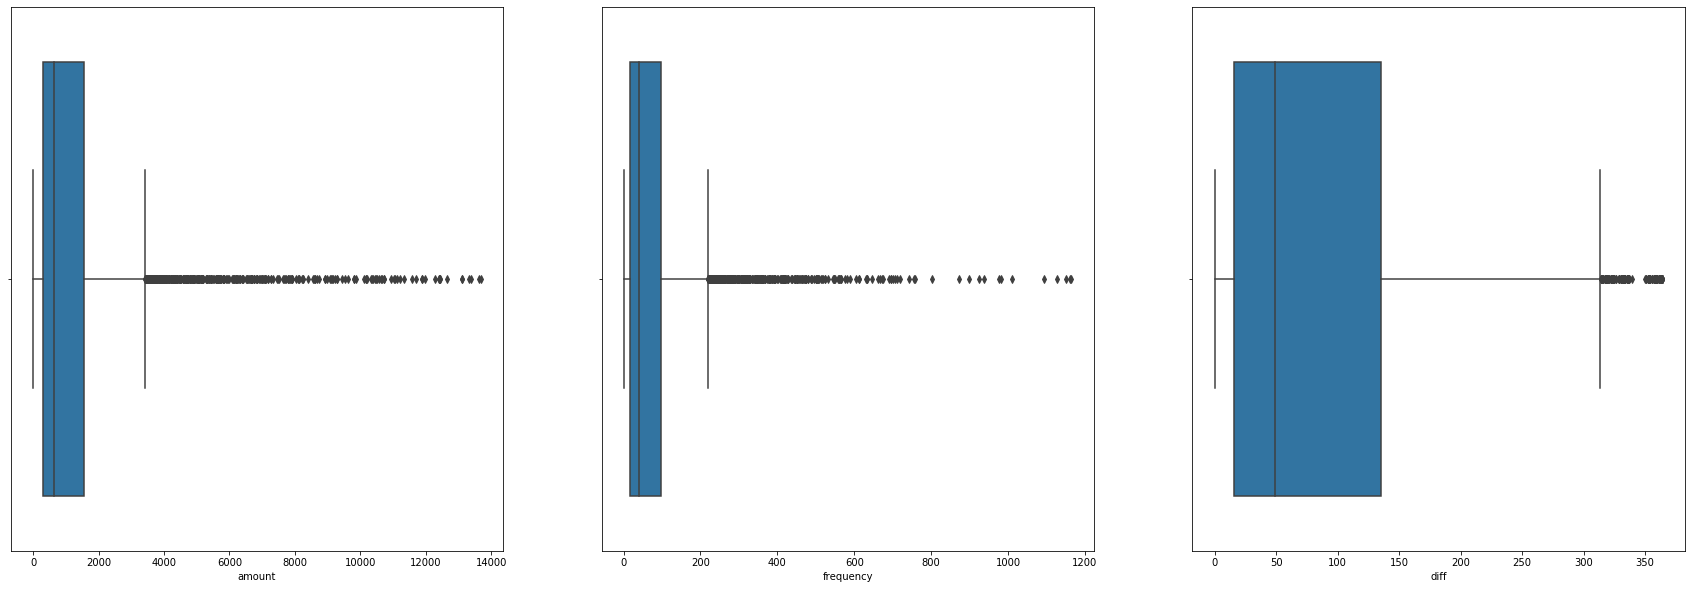

In [102]:
# 1. outlier treatment
plt.figure(figsize=(30,10))
plt.subplot(131)
sns.boxplot(grouped_df[(grouped_df.amount > 0) & (grouped_df.amount<30000)]['amount'])

plt.subplot(132)
sns.boxplot(grouped_df[grouped_df.frequency<1200]['frequency'])

plt.subplot(133)
sns.boxplot(grouped_df[grouped_df<365]['diff'])

plt.show()

In [70]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(grouped_df[['amount', 'frequency', 'diff']])
rfm_df_scaled.shape

(4313, 3)

In [77]:
## Hopkin's Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [104]:
#First convert the numpy array that you have to a dataframe
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']

In [105]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.9828356656715345

In [106]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.985020764122896

In [83]:
from sklearn.cluster import KMeans

In [107]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [108]:
kmeans.labels_

array([0, 2, 3, ..., 3, 1, 3])

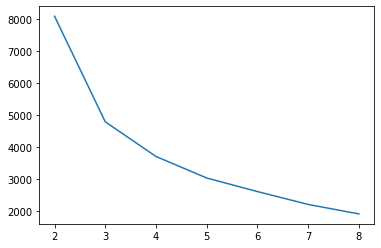

In [109]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters,ssd)

In [89]:
#silhouette analysis
from sklearn.metrics import silhouette_score

For n_clusters=2, the silhouette score is 0.5550675911906915
For n_clusters=3, the silhouette score is 0.521209985231851
For n_clusters=4, the silhouette score is 0.49638165348444246
For n_clusters=5, the silhouette score is 0.4951866202787596
For n_clusters=6, the silhouette score is 0.4327254970624728
For n_clusters=7, the silhouette score is 0.4287243210095973
For n_clusters=8, the silhouette score is 0.4221529060490244


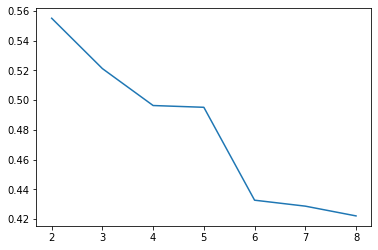

In [110]:
ss = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    #silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(n_clusters, silhouette_avg))
    ss.append(silhouette_avg)

plt.plot(range_n_clusters, ss)

In [118]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

grouped_df['cluster_id'] = kmeans.labels_
grouped_df

CustomerID   amount  frequency  diff  cluster_id
0        12346.0     0.00          2   325           1
1        12347.0  4310.00        182     1           2
2        12348.0  1797.24         31    74           0
3        12349.0  1757.55         73    18           0
4        12350.0   334.40         17   309           1
...          ...      ...        ...   ...         ...
4367     18280.0   180.60         10   277           1
4368     18281.0    80.82          7   180           1
4369     18282.0   176.60         13     7           0
4370     18283.0  2094.88        756     3           2
4371     18287.0  1837.28         70    42           0

[4313 rows x 5 columns]

In [119]:
grouped_df.cluster_id.value_counts()

0    2816
1    1071
2     426
Name: cluster_id, dtype: int64

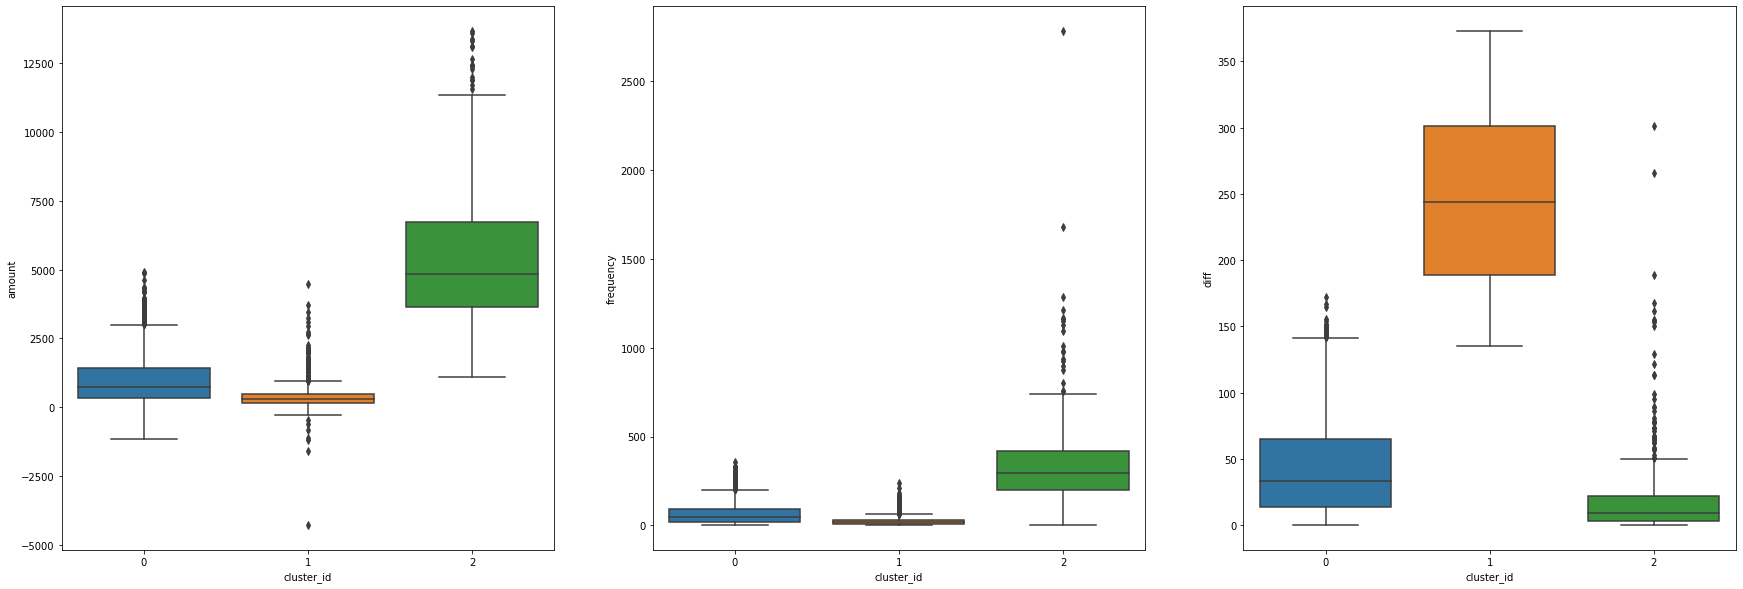

In [120]:
# 1. outlier treatment
plt.figure(figsize=(30,10))
plt.subplot(131)
sns.boxplot(data=grouped_df, x='cluster_id', y='amount')

plt.subplot(132)
sns.boxplot(data=grouped_df, x='cluster_id', y='frequency')

plt.subplot(133)
sns.boxplot(data=grouped_df, x='cluster_id', y='diff')

plt.show()

## Hierarchical Clustering

In [121]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [123]:
grouped_df.head()

CustomerID   amount  frequency  diff  cluster_id
0     12346.0     0.00          2   325           1
1     12347.0  4310.00        182     1           2
2     12348.0  1797.24         31    74           0
3     12349.0  1757.55         73    18           0
4     12350.0   334.40         17   309           1

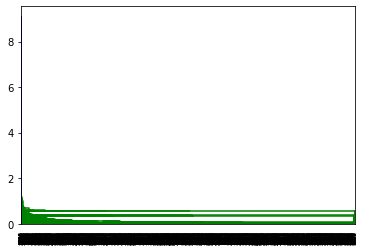

In [124]:
#single linkage - minimum distance between clusters
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

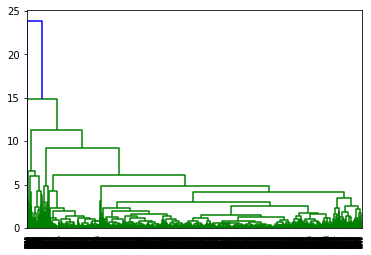

In [125]:
#complete linkage - maximum distance between clusters
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [127]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1,)

In [128]:
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

CustomerID   amount  frequency  diff  cluster_id  cluster_labels
0     12346.0     0.00          2   325           1               0
1     12347.0  4310.00        182     1           2               0
2     12348.0  1797.24         31    74           0               0
3     12349.0  1757.55         73    18           0               0
4     12350.0   334.40         17   309           1               0

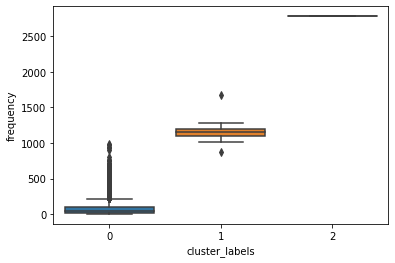

In [132]:
sns.boxplot(x='cluster_labels', y='frequency', data=grouped_df)
plt.show()